CSV contains following fields:
 ['/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/center_2017_02_11_16_27_06_267.jpg', '/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/left_2017_02_11_16_27_06_267.jpg', '/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/right_2017_02_11_16_27_06_267.jpg', '-0.04230542', '0', '0', '13.18453']


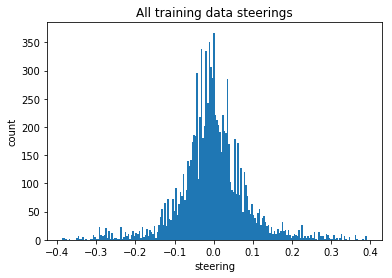

In [14]:
"""The script used to create and train the model."""
from scipy.misc import imread
from sklearn.model_selection import train_test_split

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import logging
import csv
import os
import random

%matplotlib inline

# Inspect training data
left_images = []
center_images = []
right_images = []
steerings = []
with open('./data/driving_log.csv', 'r') as f:
    csv_reader = csv.reader(f, skipinitialspace=True)
    headers = next(csv_reader)
    print('CSV contains following fields:\n', headers)
    for row in csv_reader:
        (center, left, right, steering,
         throttle, brake, speed) = row
        left_images.append(left)
        center_images.append(center)
        right_images.append(right)

        steerings.append(float(steering))

# draw histogram
plt.hist(steerings, bins=200)
plt.title('All training data steerings')
plt.ylabel('count')
plt.xlabel('steering')
plt.show()


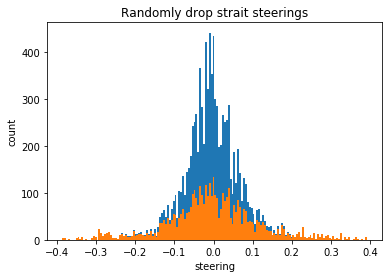

In [15]:

from math import e, sqrt, pi

dropped_steerings = []

def gaussian_dropper(mu=0, sigma=0.1, drop_rate=0.5):
    def gauss(x, mu=mu, sigma=sigma):
        a = 1/(sigma*sqrt(2*pi))
        gauss = a*e**(-0.5*(float(x-mu)/sigma)**2)
        return gauss
    
    max_gauss = gauss(mu)
    def dropper(steering, drop_rate=drop_rate):
        steering_drop_rate = drop_rate * gauss(steering)/max_gauss
        return random.random() < steering_drop_rate
    
    return dropper


should_drop = gaussian_dropper(drop_rate=0.7)
    
for steering in steerings:
    if should_drop(steering):
        continue
    else:
        dropped_steerings.append(steering)

bins = 160
plt.hist(steerings, bins, label='orig')
plt.hist(dropped_steerings, bins, label='dropped')
plt.title('Randomly drop strait steerings')
plt.ylabel('count')
plt.xlabel('steering')
plt.show()        



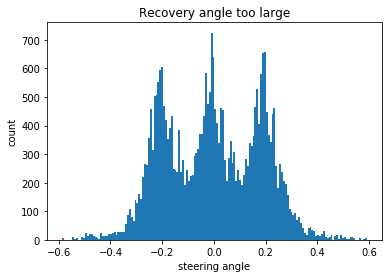

In [16]:
# If recovery angle too large
# Add recovery data
recovery_steerings = []
for steering in steerings:
    recovery = 5./25.
    recovery_steerings.append(steering)
    recovery_steerings.append(steering + recovery)
    recovery_steerings.append(steering - recovery)


# draw histogram overlay
plt.hist(recovery_steerings, bins=160)
plt.title('Recovery angle too large')
plt.ylabel('count')
plt.xlabel('steering angle')
plt.show()

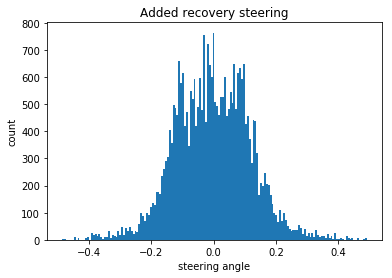

In [17]:
# Add recovery data
recovery_steerings = []
for steering in steerings:
    recovery = 0.1
    recovery_steerings.append(steering)
    recovery_steerings.append(steering + recovery)
    recovery_steerings.append(steering - recovery)


# draw histogram overlay
plt.hist(recovery_steerings, bins=160)
plt.title('Added recovery steering')
plt.ylabel('count')
plt.xlabel('steering angle')
plt.show()



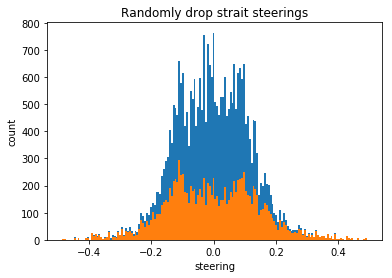

In [18]:
# drop recovery
dropped_recovery_steerings = []
should_drop = gaussian_dropper(sigma=0.18, drop_rate=0.7)

for steering in recovery_steerings:
    if should_drop(steering):
        continue
    else:
        dropped_recovery_steerings.append(steering)

bins = 160
plt.hist(recovery_steerings, bins, label='orig')
plt.hist(dropped_recovery_steerings, bins, label='dropped')
plt.title('Randomly drop strait steerings')
plt.ylabel('count')
plt.xlabel('steering')
plt.show()        


10098
7332
left /Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/left_2017_02_11_16_40_19_181.jpg


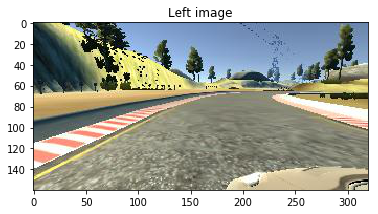

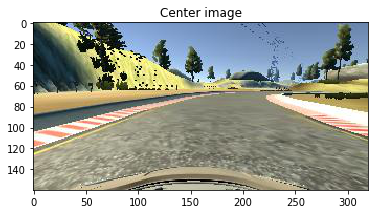

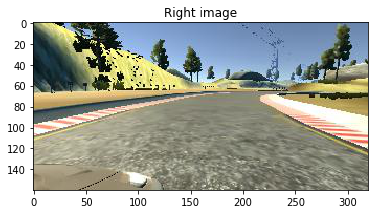

In [21]:
import random

print(len(center_images))
rand_index = random.randint(0, len(center_images))
print(rand_index)
center_img_path = center_images[rand_index]
left_img_path = left_images[rand_index]
right_img_path = right_images[rand_index]

# display left image
print('left %s'% left_img_path)
abs_path = os.path.join(os.getcwd(), 'data', left_img_path)
img = mpimg.imread(abs_path)
plt.imshow(img)
plt.title('Left image')
plt.show()

# display center image
abs_path = os.path.join(os.getcwd(), 'data', center_img_path)
img = mpimg.imread(abs_path)
plt.imshow(img)
plt.title('Center image')
plt.show()

# display right image
abs_path = os.path.join(os.getcwd(), 'data', right_img_path)
img = mpimg.imread(abs_path)
plt.imshow(img)
plt.title('Right image')
plt.show()
